## 1. Load & clean data

In [62]:
# imports libraries
import pandas as pd
import numpy as np
import re
from transformers import pipeline
from tqdm import tqdm


In [63]:
# 1. read data file
df = pd.read_excel("data/amazon_product_reviews.xlsx", sheet_name=0, engine='openpyxl')

In [64]:
# import re

def clean_text(text):
    if isinstance(text, str):
        # Remove non-printable and control characters
        return re.sub(r'[^\x20-\x7E\u0600-\u06FF]', '', text)
    return text

# --- Clean numeric-like columns  ---
numeric_like_cols = ["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]

for col in numeric_like_cols:
    if col in df.columns:
        # Remove non-digit characters (keep dot)
        df[col] = df[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
        # Convert to float; invalids become NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# save cleaned data
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

In [65]:
print("First 5 rows:")
display(df.head())

print(f"\n Shape of dataset: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n Info:")
df.info()

print("\n Missing values per column:")
print(df.isnull().sum())

print("\n Duplicates:", df.duplicated().sum())

print("\n Summary stats:")
display(df.describe())


First 5 rows:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1099.0,0.64,4.2,24269.0,"High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQ...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original i...",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZA...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RYGGS0M09S3KY,R17KQRUTAN5DKS,R3AAQGS6HP2QUK,R1HDNOG6TO2CCA,R3PHKXYA5AFEOU","A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's sti...,https://m.media-amazon.com/images/W/WEBP_402378-T2/images/I/31zOsqQOAOL._SY445_SX342_QL70_FMwebp_.jpg,https://www.amazon.in/Ambrane-Unbreakable-Charging-Braided-Cable/dp/B098NS6PVG/ref=sr_1_2?qid=1672909124&s=electronics&sr=1-2
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.0,1899.0,0.90,3.9,7928.0,ã€ Fast Charger& Data Syncã€‘-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and enhance charging & data transfer speed with up to 480 mb...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQLWQOWZ4N3OA,AHTPQRIMGUD4BYR5YIHBH3CCGEFQ,AEUVWXYP5LT7PZLLZENEO2NODPBQ,AHC7MPW55DOO6WNCOQVA2VHOD26A,AFDI6FRPFBTNBG7BAEB7JDJSMKDQ,AFQKCEEEKXCOHTDG4WUN3X...","Kunal,Himanshu,viswanath,sai niharka,saqib malik,Aashiq,Ramu Challa,Sanjay gupta","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R25X4TBMPY91LX,R27OK7G99VK


 Shape of dataset: 1465 rows × 16 columns

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096585,18295.541353
std,6944.304394,10874.826864,0.216359,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


### Initial Data Inspection

- Entries: 1465 rows × 16 columns  
- Data Types:  
  - Textual info (IDs, names, reviews, links) → `object`  
  - Numerical info (prices, discounts, ratings) → `float64`  
- Missing Values: 
  - `rating`: 1 missing  
  - `rating_count`: 2 missing  
- Duplicates: No duplicate 


In [66]:
# --- Handle nulls in numeric columns by zero in : "rating", "rating_count"  ---

# For rating and rating_count -> fill with 0
numeric_like_cols = ["rating", "rating_count"]
for col in numeric_like_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)  # 0 = no reviews / no ratings


# they don't have text null: Handle nulls in text/object columns
# for col in df.select_dtypes(include='object').columns:
#     df[col] = df[col].fillna("Unknown")

# --- Save cleaned data ---
df.to_excel("data/amazon_product_reviews_cleaned.xlsx", index=False, engine='openpyxl')

print("✅ Data cleaned & null values handled successfully!")
print(df.isnull().sum())



✅ Data cleaned & null values handled successfully!
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


###  Handling Missing Values

- Missing Columns:`rating`, `rating_count`  
- Filling Strategy:  
  - If there’s no rating, that means no reviews → fill with `0`.  
  - If there’s no rating count, that means no people rated → fill with `0`.  
- If the **price is missing**, I will fill it with the **median value** of that column, because filling with `0` would wrongly suggest the product is free!.  

This way, missing values are treated logically without affecting pricing or product details.

In [67]:
# Outliers
print("\nColumns Suspected of Having Outliers:")
numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"- {col}: {len(outliers)} outliers")


Columns Suspected of Having Outliers:
- discounted_price: 217 outliers
- actual_price: 213 outliers
- discount_percentage: 0 outliers
- rating: 75 outliers
- rating_count: 141 outliers


**Handle Outliers**  
I will **not remove outliers** because in a sales dataset, extreme values can still represent **real-world scenarios** such as premium products, highly discounted items, or products with exceptionally high review counts.  
Removing them could distort the analysis and hide important business insights.

## 2. EDA (Exploratory Data Analysis)

#### 2.1 Numerical columns analysis: discounted_price, actual_price, discount_percentage, rating, rating_count.

In [70]:
# =========================================
# 4. Exploratory Data Analysis (EDA)
# =========================================

# Summary statistics
print(df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].describe())

# Top selling products (by rating_count or revenue)
df['revenue'] = df['discounted_price'] * df['rating_count']
top_sales = df.sort_values(by='revenue', ascending=False).head(10)
print(top_sales[['product_name', 'revenue', 'rating_count', 'discounted_price']])

output_path = "data/amazon_product_reviews_cleaned.xlsx"

# Save to Excel (overwrite the existing file)
df.to_excel(output_path, index=False, engine='openpyxl')
print(f"✅ Updated cleaned data with features saved successfully to:\n{output_path}")


       discounted_price   actual_price  discount_percentage       rating   rating_count
count       1465.000000    1465.000000          1465.000000  1465.000000    1465.000000
mean        3125.310874    5444.990635             0.476915     4.093788   18270.564505
std         6944.304394   10874.826864             0.216359     0.310598   42729.995315
min           39.000000      39.000000             0.000000     0.000000       0.000000
25%          325.000000     800.000000             0.320000     4.000000    1173.000000
50%          799.000000    1650.000000             0.500000     4.100000    5178.000000
75%         1999.000000    4295.000000             0.630000     4.300000   17325.000000
max        77990.000000  139900.000000             0.940000     5.000000  426973.000000
                                                                                                     product_name       revenue  rating_count  discounted_price
370                  Redmi 9 Activ (Carbon Black

#### 2.2 Categorical analysis: category

In [71]:
# Count products per category
category_counts = df['category'].value_counts()
print(category_counts.head(10))

# If categories are separated by ">"
df['main_category'] = df['category'].apply(lambda x: x.split("|")[0].strip())
main_category_counts = df['main_category'].value_counts()
print(main_category_counts)

# Save to Excel (overwrite the existing file)
df.to_excel(output_path, index=False, engine='openpyxl')
print(f"✅ Updated cleaned data with features saved successfully to:\n{output_path}")


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitch

## 3. Feature Engineering

In [72]:
# =========================================
#  Feature Engineering
# =========================================
# Benefits for Chatbot: These features provide numerical representations of product attributes
# that a chatbot can use to filter, recommend, or answer specific queries without deep text processing
# every time. They enrich the product catalog.

df['has_discount'] = df['discount_percentage'] > 0
# Why: A simple boolean flag. Chatbots can use this to quickly answer "Are there any discounted items?"

df['review_length'] = df['review_content'].apply(lambda x: len(str(x).split()))
# Why: Longer reviews might indicate more detailed feedback, either positive or negative.
#      A chatbot could prioritize showing reviews with a certain length for more context.

df['popularity'] = df['rating'] * df['rating_count']
# Why: Combines both quality (rating) and quantity of feedback (rating_count) into a single metric.
#      A product with a 5.0 rating from 1 review is less popular than a 4.5 rating from 1000 reviews.
#      Useful for "Show me popular products."

df['price_tier'] = pd.qcut(df['discounted_price'], q=4, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'], duplicates='drop')
# Why: Categorizes products into price segments. Chatbots can answer "Show me budget laptops" or "What's in the luxury category?".
#      qcut ensures an even distribution across tiers.

df['discount_level'] = pd.cut(df['discount_percentage'], bins=[-1, 10, 25, 50, 100],
                              labels=['No/Low Discount', 'Moderate Discount', 'High Discount', 'Very High Discount'],
                              right=False, include_lowest=True)
# Why: Similar to price tier, but for discounts. Chatbots can answer "Show me products with high discounts."
#      Right=False and include_lowest=True handle the bins correctly for 0% discount.

# Text-based Feature Engineering (for review_content)
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation and special characters
    return text

df['cleaned_review'] = df['review_content'].apply(clean_text)
# Why: Essential preprocessing for text analysis. Removes noise, standardizes text.

# Extract keywords/n-grams (simple example)
# For a more robust approach, you'd use TF-IDF or embedding.
def extract_top_words(text_series, num_words=50):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return [word for word, count in word_counts.most_common(num_words)]

# This is a general list for the entire dataset. For product-specific keywords,
# you'd group by product and apply this function.
common_words = extract_top_words(df['cleaned_review'])
print(f"\nTop 50 most common words in reviews: {common_words}")
# Why: Can help identify overarching themes. For a chatbot, this can guide
#      responses or suggest common queries ("What about 'quality'?", "Is 'fast delivery' common?").

print("\nFeatures after Engineering (Sample):\n",
      df[['product_name','has_discount','review_length','popularity','price_tier','discount_level']].head())

output_path = "data/amazon_product_reviews_cleaned.xlsx"

# Save to Excel (overwrite the existing file)
df.to_excel(output_path, index=False, engine='openpyxl')

print(f"✅ Updated cleaned data with features saved successfully to:\n{output_path}")
print("\nMissing values check after feature engineering:")
print(df.isnull().sum())


Top 50 most common words in reviews: ['the', 'is', 'and', 'to', 'it', 'for', 'a', 'i', 'of', 'good', 'this', 'in', 'but', 'not', 'with', 'product', 'you', 'on', 'its', 'as', 'my', 'very', 'have', 'quality', 'that', 'are', 'be', 'was', 'so', 'if', 'use', 'can', 'at', 'one', 'cable', 'or', 'from', 'like', 'will', 'price', 'also', 'which', 'no', 'has', 'all', 'after', 'only', 'using', 'phone', 'charging']

Features after Engineering (Sample):
                                                                                                                                                                                               product_name  has_discount  review_length  popularity price_tier   discount_level
0                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)          True             60    101929.8  Mid-Range  No/Low Discount
1        A

In [73]:
# 1. Sanity check categorical distributions
print("\nPrice Tier distribution:\n", df['price_tier'].value_counts())
print("\nDiscount Level distribution:\n", df['discount_level'].value_counts())

# 2. Sanity check numeric ranges
print("\nReview length min/max:", df['review_length'].min(), df['review_length'].max())
print("Popularity min/max:", df['popularity'].min(), df['popularity'].max())

# 3. Spot products with missing or extreme values
print("\nProducts with unusually short reviews:\n", df[df['review_length'] < 5].head())
print("\nProducts with extreme popularity:\n", df.sort_values('popularity', ascending=False).head())



Price Tier distribution:
 price_tier
Budget       370
Mid-Range    369
Premium      364
Luxury       362
Name: count, dtype: int64

Discount Level distribution:
 discount_level
No/Low Discount       1465
Moderate Discount        0
High Discount            0
Very High Discount       0
Name: count, dtype: int64

Review length min/max: 11 2974
Popularity min/max: 0.0 1878681.2000000002

Products with unusually short reviews:
 Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link, revenue, main_category, has_discount, review_length, popularity, price_tier, discount_level, cleaned_review]
Index: []

Products with extreme popularity:
      product_id                                                                         product_name                                                        category  discounted_pri

## 4. Sentiment Analysis

Using a Hugging Face pretrained model (distilbert-base-uncased-finetuned-sst-2-english):

In [76]:
# import pandas as pd
# from transformers import pipeline

# Load the cleaned dataset (with all feature engineering)
df = pd.read_excel("data/amazon_product_reviews_cleaned.xlsx", engine='openpyxl')

# Load the original dataset to preserve emojis
df_original = pd.read_excel("data/amazon_product_reviews.xlsx", engine='openpyxl')

# Replace the review_content column with the original (emoji-preserved) reviews
df['review_content'] = df_original['review_content']

# Initialize sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply sentiment analysis
df['review_sentiment'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['label'] if x.strip() else "NEUTRAL"
)
df['sentiment_score'] = df['review_content'].astype(str).apply(
    lambda x: sentiment_model(x[:512])[0]['score'] if x.strip() else 0.0
)

# Map sentiment to numeric
sentiment_mapping = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df['sentiment_numerical'] = df['review_sentiment'].map(sentiment_mapping)

print("\nSentiment Counts:\n", df['review_sentiment'].value_counts())

# Save back to the same file
output_path = "data/amazon_product_reviews_cleaned.xlsx"
df.to_excel(output_path, index=False, engine='openpyxl')

print(f"✅ Sentiment analysis added, dataset updated and saved to:\n{output_path}")


Device set to use cpu



Sentiment Counts:
 review_sentiment
POSITIVE    894
NEGATIVE    571
Name: count, dtype: int64
✅ Sentiment analysis added, dataset updated and saved to:
data/amazon_product_reviews_cleaned.xlsx


## 5. Visualization


Average Sentiment Score per Product (Top 10):
 product_name
realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5" inch Large Display                                                                                        1.0
realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)                                       1.0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!                                                                                  1.0
10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor                       1.0
iQOO Z6 Lite 5G by vivo (Stellar Green, 6GB RAM, 128GB Storage) | World's First Snapdragon 4 Gen 1 | 120Hz Refresh Rate | 5000mAh Battery | Travel Adapter to be Purchased Separately  

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\1831040055.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')


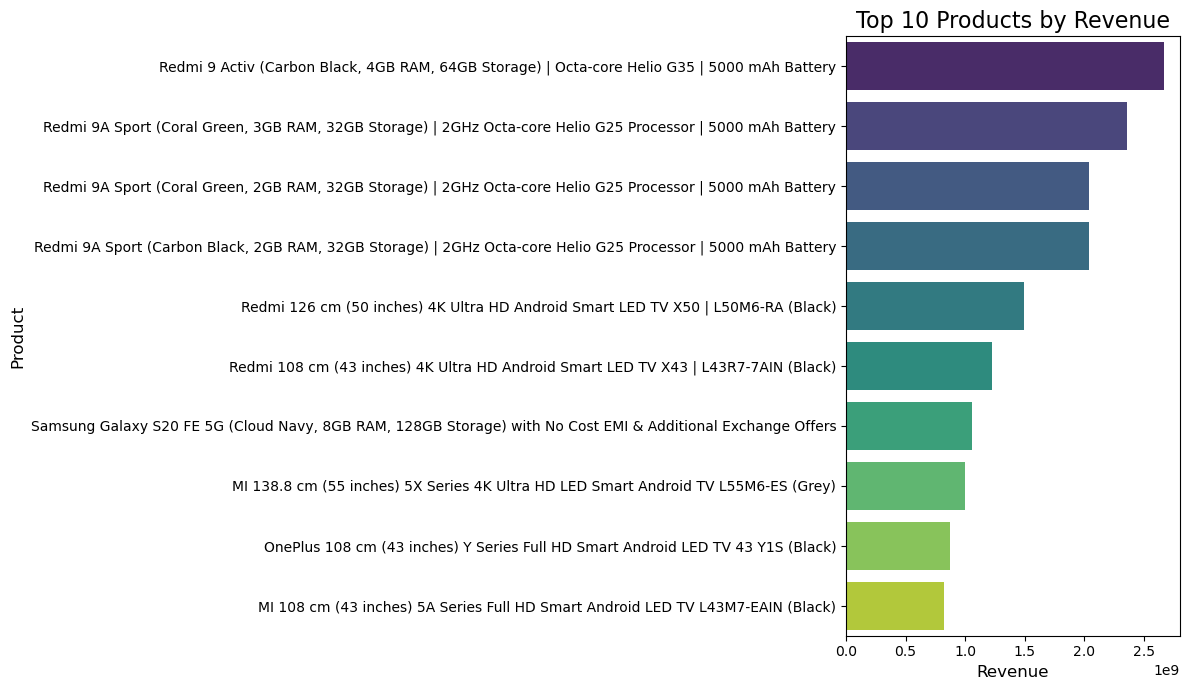

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\1831040055.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])


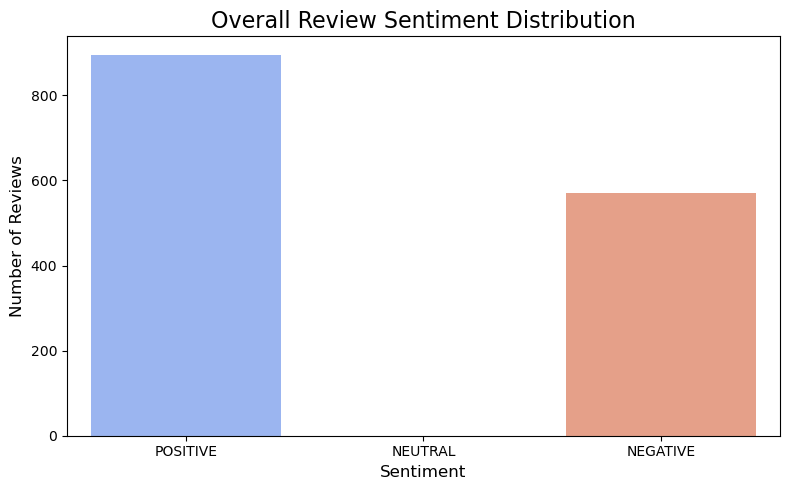

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\1831040055.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\1831040055.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


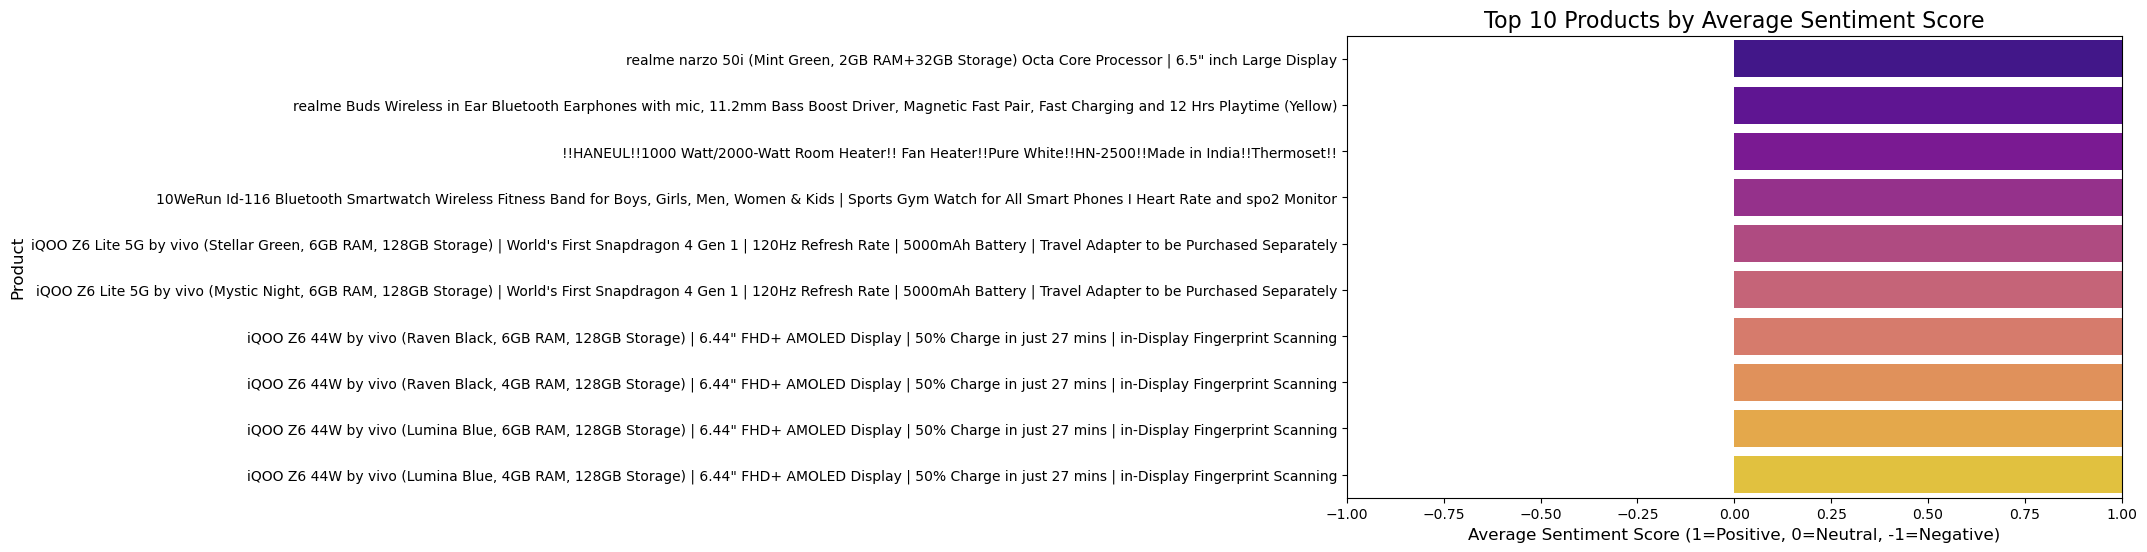

C:\Users\ralkhalaqi.t\AppData\Local\Temp\ipykernel_17640\1831040055.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')


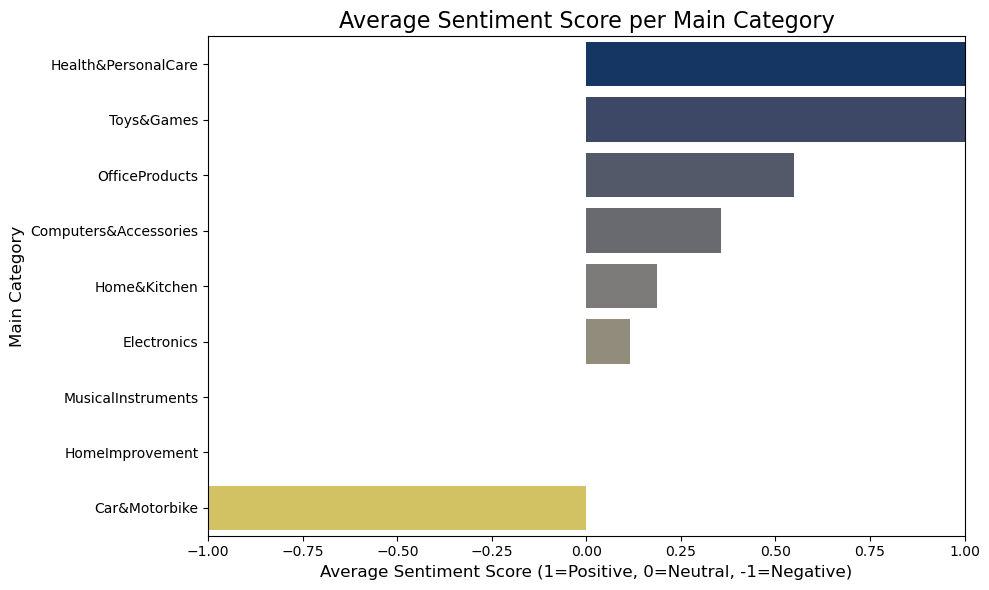

In [77]:
# Aggregate Sentiment by Product & Category
# =========================================
# Why: Provides summarized sentiment insights at different levels, which is highly valuable for a chatbot.

# Average sentiment score per product
product_avg_sentiment = df.groupby('product_name')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Product (Top 10):\n", product_avg_sentiment.head(10))
print("\nAverage Sentiment Score per Product (Bottom 10):\n", product_avg_sentiment.tail(10))

# Average sentiment score per main category
category_avg_sentiment = df.groupby('main_category')['sentiment_numerical'].mean().sort_values(ascending=False)
print("\nAverage Sentiment Score per Main Category:\n", category_avg_sentiment)

# Count of positive, neutral, negative reviews per product
product_sentiment_counts = df.groupby(['product_name', 'review_sentiment']).size().unstack(fill_value=0)
product_sentiment_counts['total_reviews'] = product_sentiment_counts.sum(axis=1)
product_sentiment_counts['positive_ratio'] = product_sentiment_counts['POSITIVE'] / product_sentiment_counts['total_reviews']
print("\nSentiment Counts and Positive Ratio per Product (Sample):\n", product_sentiment_counts.head())

# =========================================
# 5. Visualization
# =========================================
# Why: Visualizations help in quickly grasping trends and communicating insights.
#      While a chatbot doesn't display these, the insights derived from them are critical.

plt.figure(figsize=(12, 7))
sns.barplot(x='revenue', y='product_name', data=top_sales.head(10), palette='viridis')
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing top revenue products.
# 
# A bar chart showing the top 10 products by revenue. Each bar represents a product, and its length corresponds to the revenue generated.
# The x-axis is 'Revenue' and the y-axis is 'Product Name'. The chart has a title "Top 10 Products by Revenue".
# 

plt.figure(figsize=(8, 5))
sns.countplot(x='review_sentiment', data=df, palette='coolwarm', order=['POSITIVE', 'NEUTRAL', 'NEGATIVE'])
plt.title("Overall Review Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing overall sentiment distribution.
# 
# A count plot displaying the distribution of review sentiments (POSITIVE, NEUTRAL, NEGATIVE).
# The x-axis is 'Sentiment' and the y-axis is 'Number of Reviews'. The chart has a title "Overall Review Sentiment Distribution".
# 

plt.figure(figsize=(10, 6))
sns.barplot(x=product_avg_sentiment.head(10).values, y=product_avg_sentiment.head(10).index, palette='plasma')
plt.title("Top 10 Products by Average Sentiment Score", fontsize=16)
plt.xlabel("Average Sentiment Score (1=Positive, 0=Neutral, -1=Negative)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xlim(-1, 1) # Set limits to sentiment score range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing top products by average sentiment.
# 
# A horizontal bar chart showing the top 10 products based on their average sentiment score.
# The x-axis represents the 'Average Sentiment Score' (ranging from -1 for Negative to 1 for Positive), and the y-axis lists the 'Product' names.
# The title of the chart is "Top 10 Products by Average Sentiment Score".
# 

plt.figure(figsize=(10, 6))
sns.barplot(x=category_avg_sentiment.values, y=category_avg_sentiment.index, palette='cividis')
plt.title("Average Sentiment Score per Main Category", fontsize=16)
plt.xlabel("Average Sentiment Score (1=Positive, 0=Neutral, -1=Negative)", fontsize=12)
plt.ylabel("Main Category", fontsize=12)
plt.xlim(-1, 1) # Set limits to sentiment score range
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# Visualizing average sentiment per main category.